## Exercises

These exercises will help you practice what you’ve learned using a new dataset.


### Dataset: `centripetal.csv`

This dataset was collected using a smartphone while someone rotated in place. It includes the following columns:

- `Angular velocity (rad/s)`: the rotational speed in **radians per second**  
- `Acceleration (m/s^2)`: the **inward acceleration** experienced during rotation (as on a carousel), measured in **m/s²**

There is a **non-linear relationship** between these two quantities:
$$
a = \omega^2 \cdot r
$$
where $a$ is the centripetal acceleration, $\omega$ is the angular speed, and $r$ is the radius (assumed constant here).


### Tasks

1. **Load and explore the data**  
   - Load the `centripetal.csv` file.  
   - Plot centripetal acceleration vs. angular speed.

2. **Fit a linear regression model**  
   - Use acceleration to predict angular speed.  
   - Compute and report the **mean squared error (MSE)**.

3. **Fit a polynomial regression model (degree 2)**  
   - Use `PolynomialFeatures` to generate features.  
   - Fit a model and compute the MSE.  
   - Which model fits the data better?

4. **Test generalization with train/test split**  
   - Use `train_test_split` to create an 80% training / 20% test split.  
   - Fit a **degree 10 polynomial model** on the training set.  
   - Plot the model’s predictions and evaluate its test error.  
   - What do you observe? Why might this happen?


💡 **Hint:** Centripetal acceleration increases **non-linearly** with angular speed. This is a great example of a case where a **linear model may be misleading**.

In [1]:
import pandas as pd

# Load the data
df = pd.read_csv(
    "https://raw.githubusercontent.com/digital-sustainability/SAI3-2025/refs/heads/main/datasets/centripetal.csv"
)
df.head()

,Time (s),Angular velocity (rad/s),Acceleration (m/s^2)
0,0.164462,0.244854,0.914340
1,0.662064,0.998748,0.681787
2,1.159666,0.849103,0.780060
3,1.657269,0.955166,1.405090
4,2.154871,1.240707,1.592679


In [2]:
# For simplicity, we will rename the columns of our dataframe
df.columns = ["time", "angular_speed", "acceleration"]
df.head()

,time,angular_speed,acceleration
0,0.164462,0.244854,0.914340
1,0.662064,0.998748,0.681787
2,1.159666,0.849103,0.780060
3,1.657269,0.955166,1.405090
4,2.154871,1.240707,1.592679


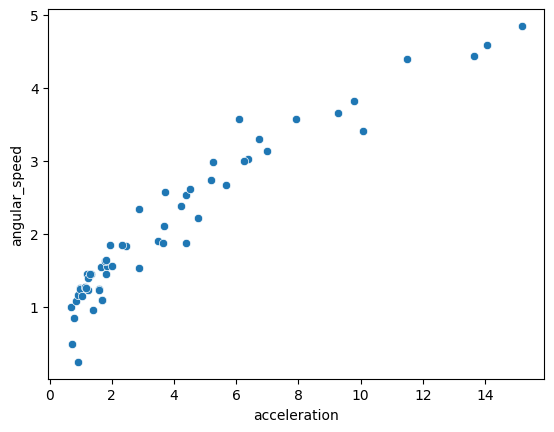

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the centripetal acceleration vs. angular speed
sns.scatterplot(df, x="acceleration", y="angular_speed")
plt.show()

In [4]:
# Fit a linear regression model and compute the mean squared error

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = df[["acceleration"]]
y = df["angular_speed"]

model_linear = LinearRegression()
model_linear.fit(X=X, y=y)

y_pred = model_linear.predict(X)

mse_model_linear = mean_squared_error(y, y_pred)

print(f"MSE for linear model: {mse_model_linear:.5f}")

MSE for linear model: 0.09996


In [5]:
# Fit a polynomial regression model with degree 2 and compute the mean squared error

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

model_poly = LinearRegression()
model_poly.fit(X=X_poly, y=y)

y_pred = model_poly.predict(X_poly)

mse_model_poly = mean_squared_error(y, y_pred)

print(f"MSE for polynomial (degree 2) model: {mse_model_poly:.5f}")

MSE for polynomial (degree 2) model: 0.06575


We see that the MSE is lower for the polynomial regression model, which means that it approximates the relationship between acceleration and angular speed better than the linear model.

/Users/rvl1/.local/share/virtualenvs/SAI3-2025-Dx0OIx0W/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/Users/rvl1/.local/share/virtualenvs/SAI3-2025-Dx0OIx0W/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


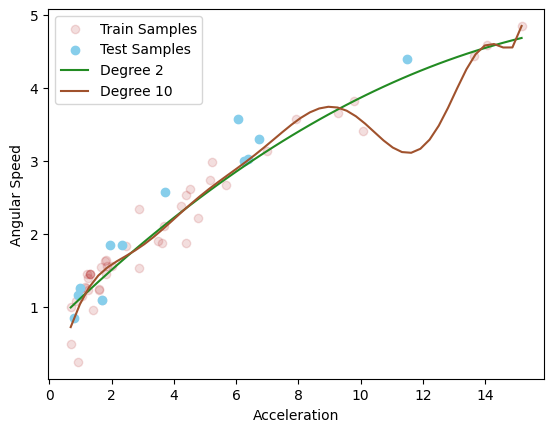

MSE for model with polynomial features of degree 2: 0.09384
MSE for model with polynomial features of degree 10: 0.22513


In [7]:
import numpy as np
from sklearn.model_selection import train_test_split

# Split the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2025)


fig, ax = plt.subplots()
ax.scatter(X_train.values, y_train, c="firebrick", alpha=0.15, label="Train Samples")
ax.scatter(X_test.values, y_test, c="skyblue", label="Test Samples")

# We will plot the predictions for a specific range of x values
x_range = np.linspace(df.acceleration.min(), df.acceleration.max(), 50).reshape(-1, 1)

degrees = [2, 10]
colors = ["forestgreen", "sienna"]

# To make the comparison easier, we will run the code below for degree 2 and 10
errors = []
for i in range(2):
    # Apply feature engineering
    poly = PolynomialFeatures(degree=degrees[i])
    X_poly = poly.fit_transform(X_train)

    # Train the model on train split
    model_poly = LinearRegression()
    model_poly.fit(X_poly, y_train)

    # Plot the predictions on the x_range
    ax.plot(x_range, model_poly.predict(poly.transform(x_range)), c=colors[i], label=f"Degree {degrees[i]}")

    # Compute the predictions and the mean squared error on the test set
    y_pred = model_poly.predict(poly.transform(X_test))
    mse = mean_squared_error(y_test, y_pred)
    errors.append(mse)

ax.set_xlabel("Acceleration")
ax.set_ylabel("Angular Speed")
ax.legend()
plt.show()

for i in range(2):
    print(f"MSE for model with polynomial features of degree {degrees[i]}: {errors[i]:.5f}")

We see that in this case, the polynomial with degree 10 is clearly overfitting to the outlier sample at acceleration $\approx$ 10. This is only happening because we chose such a high degree for the polynomial features. Moreover, it highly depends on how you construct your train and test set, since this dataset has only a few samples in general. If you choose another `random_state` in the `train_test_split` function above, the plot looks totally different. Try it out on your own!